In [35]:
#  week 1 
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm

# generate 100 experiments
n_experiments = 100
n_trials = 50
mu_s = 1
mu_s0 = 0
sigma = 1


# generate 1 experiments
experiments_sti = np.random.normal(mu_s, sigma, (n_trials))
experiments_nosti = np.random.normal(mu_s0, sigma, (n_trials))

In [36]:
c_unb, c_b_yes, c_b_no = 0.5, 0.3, 0.7

n_experiments = 100
n_trials = 50
mu_s = 1
mu_s0 = 0
sigma = 1

N_s = 50
N_s0 = 50

d_prime_unb = []
d_prime_b_yes = []
d_prime_b_no = []

for c in [c_unb, c_b_yes,c_b_no ]:
    
    for i in range(100):
        n_tp = sum(np.random.normal(mu_s, sigma, (n_trials)) > c)
        n_fp = sum(np.random.normal(mu_s0, sigma, (n_trials)) > c)

        if c == c_unb:
            d_prime_unb.append(norm.ppf(n_tp/N_s)-norm.ppf(n_fp/N_s))
        elif c == c_b_yes:
            d_prime_b_yes.append(norm.ppf(n_tp/N_s)-norm.ppf(n_fp/N_s))
        elif c == c_b_no:
            d_prime_b_no.append(norm.ppf(n_tp/N_s)-norm.ppf(n_fp/N_s))



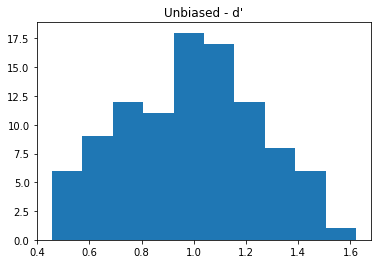

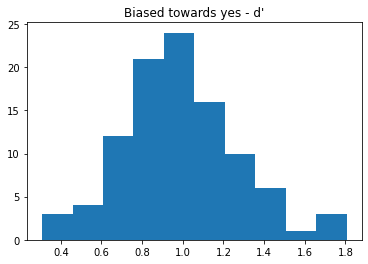

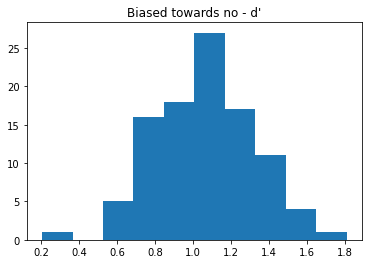

In [37]:
plt.hist(d_prime_unb, bins=10)
plt.title("Unbiased - d'")
plt.show()
plt.hist(d_prime_b_yes, bins=10)
plt.title("Biased towards yes - d'" )
plt.show()
plt.hist(d_prime_b_no, bins=10)
plt.title("Biased towards no - d'")
plt.show()

In [38]:
print( np.mean(d_prime_b_yes),np.mean(d_prime_unb), np.mean(d_prime_b_no ))
print( np.median(d_prime_b_yes),np.median(d_prime_unb), np.median(d_prime_b_no ))

0.993412475445345 0.9895699581053625 1.0545246333746008
0.9939475428911562 0.995304636712621 1.0720041528138369


# sp the yes skewed distribution has the lowest mean 
# sp the no skewed distribution has the highest mean

## lower var

In [39]:
c_unb, c_b_yes, c_b_no = 0.5, 0.3, 0.7

n_experiments = 100
n_trials = 50
mu_s = 1
mu_s0 = 0
sigma = 0.8
sigma_s0=1

N_s = 50
N_s0 = 50

d_prime_unb = []
d_prime_b_yes = []
d_prime_b_no = []

for c in [c_unb, c_b_yes,c_b_no ]:
    
    for i in range(100):
        n_tp = sum(np.random.normal(mu_s, sigma, (n_trials)) > c)
        n_fp = sum(np.random.normal(mu_s0, sigma_s0, (n_trials)) > c)

        if c == c_unb:
            d_prime_unb.append(norm.ppf(n_tp/N_s)-norm.ppf(n_fp/N_s))
        elif c == c_b_yes:
            d_prime_b_yes.append(norm.ppf(n_tp/N_s)-norm.ppf(n_fp/N_s))
        elif c == c_b_no:
            d_prime_b_no.append(norm.ppf(n_tp/N_s)-norm.ppf(n_fp/N_s))


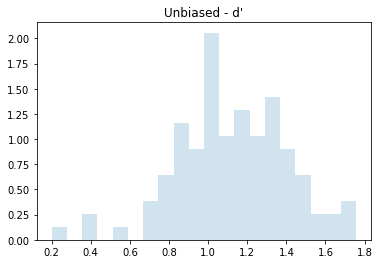

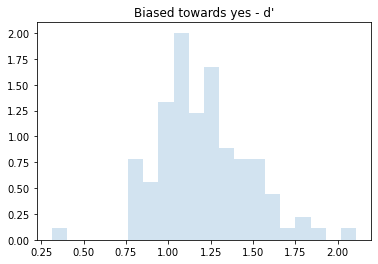

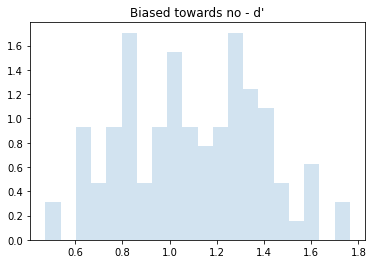

In [40]:
# plt.hist(d_prime_unb, bins=20)
plt.hist(d_prime_unb, density=True, histtype='stepfilled', alpha=0.2, bins=20)
plt.title("Unbiased - d'")
plt.show()
# plt.hist(d_prime_b_yes, bins=20)
plt.hist(d_prime_b_yes, density=True, histtype='stepfilled', alpha=0.2, bins=20)
plt.title("Biased towards yes - d'" )

plt.show()
# plt.hist(d_prime_b_no, bins=20)
plt.hist(d_prime_b_no, density=True, histtype='stepfilled', alpha=0.2, bins=20)
plt.title("Biased towards no - d'")

plt.show()

In [41]:
print( np.mean(d_prime_b_yes),np.mean(d_prime_unb), np.mean(d_prime_b_no ))

1.2094623854851765 1.1254430773915831 1.097120467030481


# Opgave fra uge 2

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression

n_experiments = 100
n_trials = 50
n_participants = 1

# mu_s = 1
# mu_s0 = 0
# sigma_s = 0.8
# sigma_s0 = 1

# Bias towards no answer (0 is 100% yes, 1 is 100% no, 0.5 is 50% each)
# C 1: yes = yes_high, no = everything else
# C 2: yes = yes_high + yes_low, no = no_high + no_low
# C 3: yes = yes_high + yes_low + no_low, no = no_high

sigma_list = []
mu_list = []

x_es = []
y_es = []



In [9]:


for i in range(n_experiments):
    stim_choices = np.random.normal(1, 0.8,50)
    no_stim_choices = np.random.normal(0, 1 ,50)

    yes_high_s =    sum([1 if i >= 0.8 else 0 for i in stim_choices])
    yes_low_s =     sum([1 if i < 0.8 and i > 0.5 else 0 for i in stim_choices])
    no_low_s =      sum([1 if i > 0.2 and i <= 0.5 else 0 for i in stim_choices])
    no_high_s =     sum([1 if i <= 0.2 else 0 for i in stim_choices])

    yes_high_s0 =   sum([1 if i >= 0.8 else 0 for i in no_stim_choices])
    yes_low_s0 =    sum([1 if i < 0.8 and i > 0.5 else 0 for i in no_stim_choices])
    no_low_s0 =     sum([1 if i > 0.2 and i <= 0.5 else 0 for i in no_stim_choices])
    no_high_s0 =    sum([1 if i <= 0.2 else 0 for i in no_stim_choices])


    tp_c1 = yes_high_s /n_trials
    tp_c2 = (yes_high_s + yes_low_s) /n_trials
    tp_c3 = (yes_high_s + yes_low_s + no_low_s) /n_trials


    fp_c1 = yes_high_s0 /n_trials
    fp_c2 = (yes_high_s0 + yes_low_s0) /n_trials
    fp_c3 = (yes_high_s0 + yes_low_s0 + no_low_s0) /n_trials

    y= np.array([norm.ppf(tp_c1), norm.ppf(tp_c2), norm.ppf(tp_c3)])
    x= np.array([norm.ppf(fp_c1), norm.ppf(fp_c2), norm.ppf(fp_c3)]).reshape((-1,1))

    x_es.append(x)
    y_es.append(y)
    
    model = LinearRegression().fit(x, y)
    intercept, slope = model.intercept_, model.coef_[0]

    sigma = 1/slope
    mu_ses = sigma*intercept

    sigma_list.append(sigma)
    mu_list.append(mu_ses)




In [10]:
sigma_c1 = sigma_list[::3]
sigma_c2 = sigma_list[1::3]
sigma_c3 = sigma_list[2::3]

In [11]:
mu_c1 = mu_list[::3]
mu_c2 = mu_list[1::3]
mu_c3 = mu_list[2::3]


c:\Users\bayka\Anaconda3\envs\katrine_personal_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\bayka\Anaconda3\envs\katrine_personal_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\bayka\Anaconda3\envs\katrine_personal_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

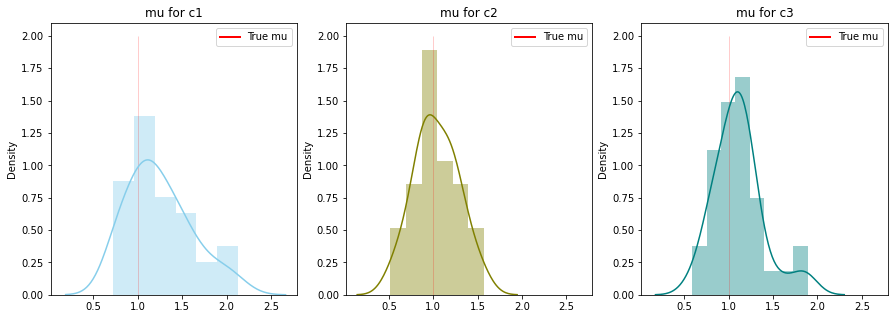

In [12]:
import seaborn as sns
colors =["skyblue", "olive", "teal"]
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
for i, ax in enumerate(axes.flatten()):
    sns.distplot( mu_list[i::3], color=colors[i%3], ax=ax)
    # plt.axvline(x=1, color=colors[i%3])  [0,max(mu_list[i::3])]
    sns.lineplot(x=1, y=[0,2], linewidth=2,color='red', ax=ax, label='True mu')
    ax.set_title(f"mu for c{i+1}")

c:\Users\bayka\Anaconda3\envs\katrine_personal_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\bayka\Anaconda3\envs\katrine_personal_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\bayka\Anaconda3\envs\katrine_personal_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

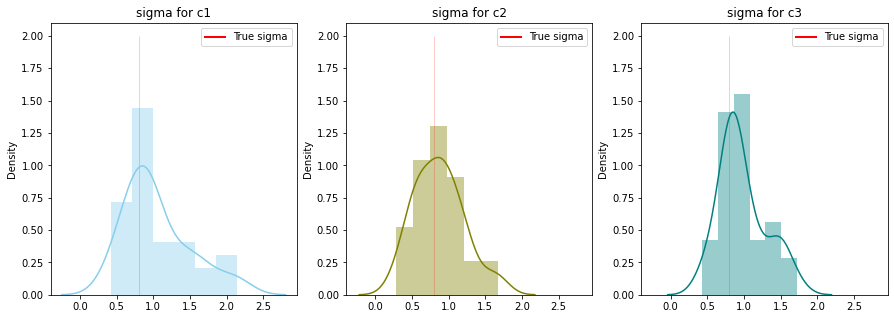

In [13]:
colors =["skyblue", "olive", "teal"]
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
for i, ax in enumerate(axes.flatten()):
    sns.distplot( sigma_list[i::3], color=colors[i%3], ax=ax)
    sns.lineplot(x=0.8, y=[0,2], linewidth=2,color='red', ax=ax, label='True sigma')

    ax.set_title(f"sigma for c{i+1}")

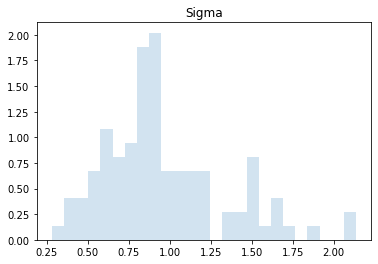

In [14]:
plt.hist(sigma_list, density=True, histtype='stepfilled', alpha=0.2, bins = 25)
plt.title("Sigma")
plt.show()


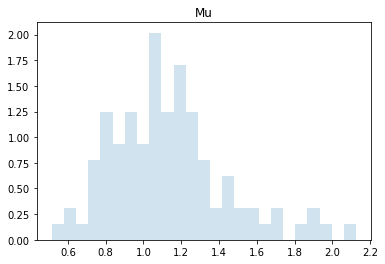

In [15]:
plt.hist(mu_list, density=True, histtype='stepfilled', alpha=0.2, bins=25)
plt.title("Mu")
plt.show()

In [16]:
print(np.median(mu_list), np.median(sigma_list))
print(np.mean(mu_list), np.mean(sigma_list))

1.0874890801247812 0.8803914009590192
1.1301172534246735 0.965529265903866


In [17]:
### Estimate the parameters of the model for each experiment. 
# Plot the distribution of the parameters across experiments. 
# Are the distributions of the parameters centered around the correct estimate?




In [18]:
## Gustavs code
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  
from scipy.stats import norm
import matplotlib.pyplot as plt

def parameter_esti(c, samples_stim, samples_nostim, N_trials):
    n_highno_nostim = sum(samples_nostim < c[0])
    n_highno_stim = sum(samples_stim < c[0])
    n_lowno_nostim = len(samples_nostim[np.logical_and(samples_nostim>=c[0],samples_nostim<c[1])])
    n_lowno_stim = len(samples_stim[np.logical_and(samples_stim>=c[0],samples_stim<c[1])])
    n_lowyes_nostim = len(samples_nostim[np.logical_and(samples_nostim>=c[1],samples_nostim<c[2])])
    n_lowyes_stim = len(samples_stim[np.logical_and(samples_stim>=c[1],samples_stim<c[2])])
    n_highyes_nostim = sum(samples_nostim > c[2])
    n_highyes_stim = sum(samples_stim > c[2])
    print("probability of High_no given no stimulus:", n_highno_nostim/N_trials)
    print("probability of High_no given stimulus:", n_highno_stim/N_trials)
    print("probability of Low_no given no stimulus:", n_lowno_stim/N_trials)
    print("probability of Low_no given stimulus:", n_lowno_nostim/N_trials)
    print("probability of Low_yes given no stimulus:", n_lowyes_nostim/N_trials)
    print("probability of Low_yes given stimulus:", n_lowyes_stim/N_trials)
    print("probability of High_yes given no stimulus:", n_highyes_nostim/N_trials)
    print("probability of High_yes given stimulus:", n_highyes_stim/N_trials)
    print("probability of Yes given no stimulus:", (n_highyes_nostim+n_lowyes_nostim)/N_trials)
    print("probability of Yes given stimulus:", (n_highyes_stim+n_lowyes_stim)/N_trials)
    print("probability of No given no stimulus:", (n_highno_nostim+n_lowno_nostim)/N_trials)
    print("probability of No given stimulus:", (n_highno_stim+n_lowno_stim)/N_trials)
    #return n_highno_nostim, n_lowno_nostim, n_lowyes_stim, n_highyes_stim

probability of High_no given no stimulus: 0.5
probability of High_no given stimulus: 0.12
probability of Low_no given no stimulus: 0.2
probability of Low_no given stimulus: 0.26
probability of Low_yes given no stimulus: 0.08
probability of Low_yes given stimulus: 0.3
probability of High_yes given no stimulus: 0.16
probability of High_yes given stimulus: 0.38
probability of Yes given no stimulus: 0.24
probability of Yes given stimulus: 0.68
probability of No given no stimulus: 0.76
probability of No given stimulus: 0.32


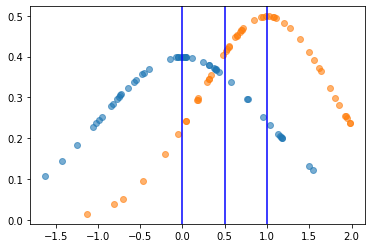

In [19]:

mu1 = 0
mu2 = 1
sigma1 = 1
sigma2 = 0.8
n_trials = 50
n_experiments = 100
c_1 = 0
c_2 = 0.5
c_3 = 1

samples_nostim = np.random.normal(mu1, sigma1, n_trials)
samples_stim = np.random.normal(mu2, sigma2, n_trials)
parameter_esti([c_1, c_2, c_3], samples_stim, samples_nostim, n_trials)

fig, ax = plt.subplots(1, 1)
ax.plot(samples_nostim, norm.pdf(samples_nostim, mu1, sigma1), 'o', ms=6, alpha=0.6, label='yes')
ax.plot(samples_stim, norm.pdf(samples_stim, mu2, sigma2), 'o', ms=6, alpha=0.6, label='yes')

c=0.5 #criterion
c_high=1 #high
c_low=0 #low
plt.axvline(x=c, color = 'b')
plt.axvline(x=c_high, color = 'b')
plt.axvline(x=c_low, color = 'b')
plt.show()

In [20]:
def estimate_c(c, mu1, mu2, sigma1, sigma2, n_trials, n_experiments):
    cs = []
    for i in range(n_experiments):
        samples_nostim = np.random.normal(mu2, sigma2, n_trials)
        nfp = sum(samples_nostim > c)
        c_est = norm.ppf(nfp/n_trials)
        cs.append(c_est)
    return np.mean(cs)

In [21]:
estimate_c(c_2, mu1, mu2, sigma1, sigma2, n_trials, n_experiments)

0.6597196991015943

In [22]:
# # Plot the distribution of the perceptual sensitivity across 
# # experiments. Are the distributions of the parameters centered 
# # around the correct estimate?

# # plot distribution of perceptual sensitivity
# plt.hist(mu, bins=20)
# plt.xlabel('Perceptual Sensitivity')
# plt.ylabel('Frequency')
# plt.show()


In [23]:
# from itertools import combinations
# data.plot.hist(subplots=True);

# psycometric function


In [24]:
# In a 3-alternative classification task, the observer classifies speech sounds under varying sound 
# intensities.
# The experiment consists of 30 experimental trials at each sound intensity. The sound 
# intensities and the corresponding number of correct responses are shown in the table below.


# Plot the psychometric function for the observer. The psy. func. is used to quantify an observer’s 
# perceptual ability in this type of tasks.

import numpy as np
import sympy
from sympy import *                   # load all math functions
# init_printing( use_latex='mathjax' )  # use pretty math output

N_r = 30
n_participants = 1

stimulus_intensity = [5, 10, 15, 20, 25, 30] 
I_s = np.array(stimulus_intensity)
number_of_correct_responses = [12, 11, 19, 27, 30, 30] 
N_c = np.array(number_of_correct_responses)
P_c = N_c/N_r
P_guess = 1/N_r

# 1.11
# P_yes_given_I = norm.ppf(I_s-c/sigma)


In [25]:
# Fit the high threshold model in Equation 1.12 and the psychometric function in Equation 1.11 to the data.

# equation 1.12
# P_c(I_s) = P_tilde_c(I_s) +(1 − P_tilde_c (I_s)) P_guess
# P_tilde_c (I_s) = the proportion correct after correcting for quessing.



# P_tilde_c = (P_c - P_guess)/(1 - P_guess)
# # equation 1.12
# equation_1_12 = sympy.Eq( P_c, P_tilde_ces + (1 - P_tilde_ces) * P_guess )




# P_tilde_c is the true underlying psycometric function

# we will fit equation 1.12 to the experimental data and use the parameter estinmates to quantify the observer's perceptual 
# sensitivity and response criterion. 

# P_c[1]


In [26]:
from sympy import symbols, Eq, solve
P_tilde_ces = []
x = symbols('x')
# expr = Eq(x + (1 - x) * P_guess - P_c[1],0)

for experiment in range(len(stimulus_intensity)):
    expr = Eq(x + (1 - x) * P_guess - P_c[experiment],0)
    P_tilde_ces.append(solve(expr))

# solve(P_c[1] == x + (1 - x) * P_guess , x)
# solve(equation_1_12 , x)

In [27]:
# thr_model = LinearRegression().fit(P_tilde_ces, psychometric_function)
# is this what we are soposed to do?
P_tilde_ces, P_c

([[0.379310344827586],
  [0.344827586206897],
  [0.620689655172414],
  [0.896551724137931],
  [1.00000000000000],
  [1.00000000000000]],
 array([0.4       , 0.36666667, 0.63333333, 0.9       , 1.        ,
        1.        ]))

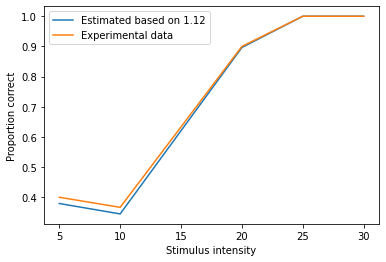

In [28]:
# Plot the estimated x

# plt.plot(P_tilde_ces, P_c)
from cProfile import label


plt.plot(stimulus_intensity, P_tilde_ces, label= 'Estimated based on 1.12')
plt.plot(stimulus_intensity, P_c, label = 'Experimental data')
plt.xlabel('Stimulus intensity')
plt.ylabel('Proportion correct')
plt.legend()
plt.show()

In [29]:


# 1.11
# P_yes_given_I = norm.pdf(I_s-c/sigma)

# for experiment in range(len(stimulus_intensity)):
#     res = np.random.normal(0, 1 ,50)

# c=20  #criterion maybe?????


# Plot the histogram.
# plt.hist(data, bins=10, density=True, alpha=0.6)

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 10)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)
# title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
# plt.title(title)

# plt.show()





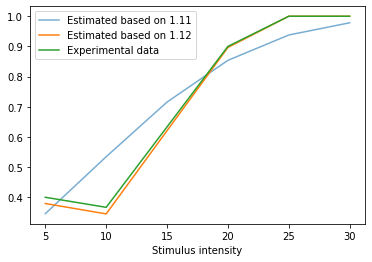

In [30]:
data = np.array([stimulus_intensity, N_c/30])

mu, std = norm.fit(data)

resul = []
for i in range(len(stimulus_intensity)):
    res = norm.cdf(stimulus_intensity[i], mu, std)
    resul.append(res)

plt.plot(stimulus_intensity, resul,  alpha=0.6, label='Estimated based on 1.11')
plt.plot(stimulus_intensity, P_tilde_ces, label= 'Estimated based on 1.12')
plt.plot(stimulus_intensity, P_c, label = 'Experimental data')
plt.xlabel('Stimulus intensity')
# plt.ylabel('Proportion correct')
plt.legend()
plt.show()


In [31]:
data 


array([[ 5.        , 10.        , 15.        , 20.        , 25.        ,
        30.        ],
       [ 0.4       ,  0.36666667,  0.63333333,  0.9       ,  1.        ,
         1.        ]])

In [32]:
mu, std = norm.fit(data)


In [33]:


# tjek denne for max log likelihood 
# https://www.moonbooks.org/Articles/How-to-calculate-a-log-likelihood-in-python-example-with-a-normal-distribution-/





# The psychometric function in equation 1.11 is a logistic regression model with the stimulus intensity as 
# the independent variable and the number of correct responses as the dependent variable.

# The logistic regression model is a special case of the generalized linear model (GLM) where the
# link function is the logistic function.

# The logistic function is a sigmoid function that maps the stimulus intensity to the probability of
# correct responses.

# The logistic function is defined as:

# p = 1/(1+exp(-x))

# where x is the stimulus intensity.



In [34]:
# Make one plot with the two psychometric functions with and the data. Estimate which of the two
# psychometric functions fit the data better

# List the value of the negative log likelihood of the two models. Which is lower?

# List the parameter values for each of the two models. Do the two models give similar estimates
# of the parameter values?